In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=a49eca926bdcd92d97c532fa9f682b4fa4c6801770b1da73b698cdf2b3929411
  Stored in directory: c:\users\shoib\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Importing the libraries 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime,Series
import wget
import seaborn as sns # you can use other packages such as matplotlib too
sns.set(style="whitegrid")

C:\Users\Shoib\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


## Importing the Data

In [2]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

100% [........................................................................] 50914963 / 50914963

## Loading the data into a Pandas Dataframe

In [3]:
# Your code

df_demog = pd.read_csv("MCQResponses.csv")

df_demog.head()

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


## Determining the No. of Data Scientist in the survey data

In [5]:
# Your code
df_demog_ds = df_demog[df_demog['CurrentJobTitleSelect'] == 'Data Scientist']
print("Number of Data Scientist: ",len(df_demog_ds))



Number of Data Scientist:  1263


## Dividing the Data scientists according to their education in the form of percentages.

             Education  No. of Data Scientist  Percentage
0            Bachelors                    252   20.000000
1              Masters                    635   50.277118
2             Doctoral                    326   25.811560
3         Professional                     25    1.979414
4          College/Uni                     19    1.504355
5  No Formal Education                      6    0.475059


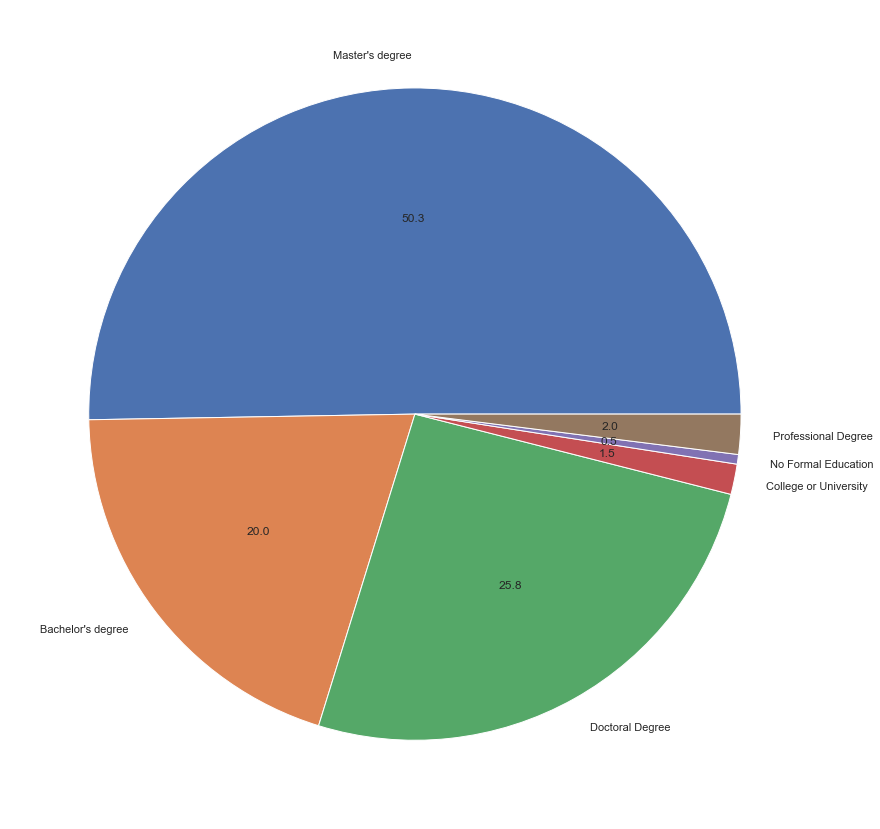

In [6]:
import pandas as pd
from pandas import DataFrame
No_of_DS = len(df_demog_ds)

masters = len(df_demog_ds[df_demog_ds['FormalEducation'] == "Master's degree"])
Bachelor = len(df_demog_ds[df_demog_ds['FormalEducation'] == "Bachelor's degree"])
Doctoral_degree = len(df_demog_ds[df_demog_ds['FormalEducation'] == "Doctoral degree"])
college_university = len(df_demog_ds[df_demog_ds['FormalEducation'] == "Some college/university study without earning a bachelor's degree"])
No_formal_Education = len(df_demog_ds[df_demog_ds['FormalEducation'] == "I did not complete any formal education past high school"])
Professional_degree = len(df_demog_ds[df_demog_ds['FormalEducation'] == "Professional degree"])

data_1 = {'Education' : ['Bachelors', 'Masters', 'Doctoral', 'Professional', 'College/Uni','No Formal Education'],
          'No. of Data Scientist' : [Bachelor, masters, Doctoral_degree, Professional_degree, college_university,No_formal_Education],
          'Percentage' : [round(Bachelor/No_of_DS*100)  , 
                          masters/No_of_DS*100, 
                          Doctoral_degree/No_of_DS*100, 
                          Professional_degree/No_of_DS*100, 
                          college_university/No_of_DS*100,
                          No_formal_Education/No_of_DS*100]}

df1 = DataFrame(data_1)
print(df1)


labels = ["Master's degree", "Bachelor's degree", 'Doctoral Degree', 'College or University', 
          "No Formal Education", 'Professional Degree']

# frequency count
xx = [masters, Bachelor, Doctoral_degree, 
      college_university, No_formal_Education, Professional_degree]
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(xx, labels=labels, autopct="%1.1f");
round?

### Using join/merge functionality to join data from 2 seperate dataframes based on 1 common column

In [7]:
# Your Code
#Joinging two columns from two different csv files
df_converRates = pd.read_csv("ConversionRates.csv")

Salary = df_demog_ds[['Country','CompensationCurrency','CompensationAmount']]
ConverRate = df_converRates[['originCountry','exchangeRate']]
df_demog_ds_merge = pd.merge(Salary, ConverRate, left_on='CompensationCurrency', right_on='originCountry')
Aud_ExRate = df_converRates[df_converRates['originCountry'] == 'AUD']['exchangeRate']


df_demog_ds_merge['Salary in Australian Dollar'] = df_demog_ds_merge['CompensationAmount'] * df_demog_ds_merge['exchangeRate']






## Generating maximum and median salary in AUD

In [11]:
# Your code
print("The maximun salary in AUD is {}$".format(max(df_demog_ds_merge['Salary in Australian Dollar'])))
print("The Median salary in AUD is {}$".format(df_demog_ds_merge["Salary in Australian Dollar"].median()
))



The maximun salary in AUD is 595884.6$
The Median salary in AUD is 71268.06$


Text(0.5, 1.0, 'Box Plot of Australian Respondents Salary Distribuition')

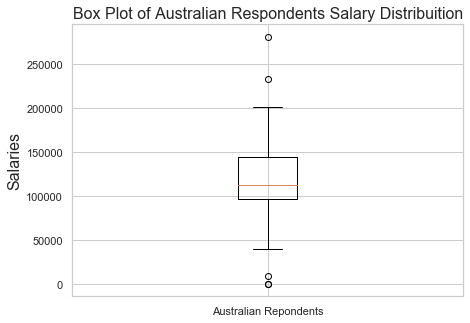

In [12]:


# Your code
import matplotlib
Aus_Respon = df_demog_ds_merge[df_demog_ds_merge['Country'] == 'Australia']
fig, ax = matplotlib.pyplot.subplots(figsize=(7, 5))

matplotlib.rcParams.update({'font.size': 14})

ax.boxplot(Aus_Respon['Salary in Australian Dollar'], 0, labels=['Australian Repondents'])

ax.set_ylabel('Salaries', fontsize=16)
ax.set_title('Box Plot of Australian Respondents Salary Distribuition', fontsize=16)

## Maximum and Median salary of Australian respondents from the survey

In [17]:
# Your code
import numpy as np


print("Maxiumum Salary for Australian Respondent is {}$".format(max(Aus_Respon['Salary in Australian Dollar'])))
print("Median Salary for Australian Respondents is {}$".format(round(Aus_Respon["Salary in Australian Dollar"].median(),2)))

Maxiumum Salary for Australian Respondent is 280808.5$
Median Salary for Australian Respondents is 112323.4$


## Filtering data based on multiple conditions

In [21]:
# your code

Filter_Aus_Respon = Aus_Respon[(Aus_Respon['Salary in Australian Dollar']>40000) & (Aus_Respon['Salary in Australian Dollar']<250000)]
print("Maxiumum Salary for Australian Respondent after removing outliers is {}$".format(round(max(Filter_Aus_Respon['Salary in Australian Dollar']),2)))
print("Median Salary for Australian Respondents after remoing outliers is {}$".format(round(Filter_Aus_Respon["Salary in Australian Dollar"].median(),2)))


Maxiumum Salary for Australian Respondent after removing outliers is 232669.9$
Median Salary for Australian Respondents after remoing outliers is 117939.57$


Text(0.5, 1.0, 'Box Plot of Australian Respondents Salary Distribuition')

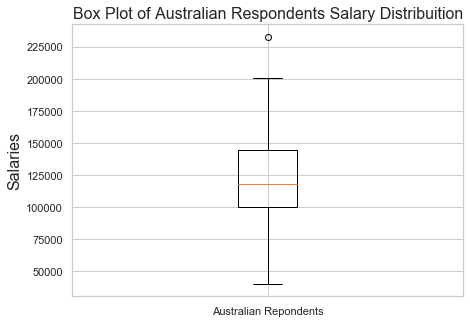

In [22]:

# Your code
fig, ax = matplotlib.pyplot.subplots(figsize=(7, 5))

matplotlib.rcParams.update({'font.size': 14})

ax.boxplot(Filter_Aus_Respon['Salary in Australian Dollar'], 0, labels=['Australian Repondents'])

ax.set_ylabel('Salaries', fontsize=16)
ax.set_title('Box Plot of Australian Respondents Salary Distribuition', fontsize=16)


## A plot to visualize the age of Data scientists from the survey data

Text(0.5, 1.0, 'Box Plot of Age with respect to Data Scientists')

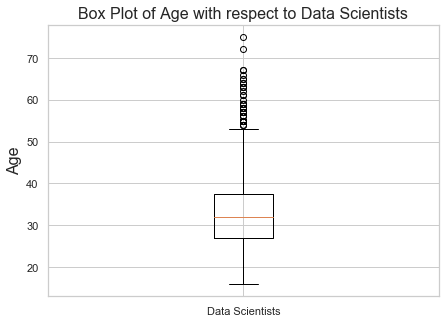

In [24]:
# Your code

fig, ax = matplotlib.pyplot.subplots(figsize=(7, 5))

matplotlib.rcParams.update({'font.size': 14})

ax.boxplot(df_demog_ds["Age"], 0, labels=['Data Scientists'])

ax.set_ylabel('Age', fontsize=16)
ax.set_title('Box Plot of Age with respect to Data Scientists', fontsize=16)

## Age summary statistics

In [25]:
# Your code
from numpy import percentile
def fNumber(data):
  quartiles = percentile(data, [25, 50, 75])
  print("Minimum :",min(data))
  print("Maximum :",max(data))
  print("Q1 :",quartiles[0])
  print("Q2/Median :",quartiles[1])
  print("Q3 :",quartiles[2])

fNumber(df_demog_ds['Age'])

Minimum : 16
Maximum : 75
Q1 : 27.0
Q2/Median : 32.0
Q3 : 37.5


## Mean age of Data Scientists

In [ ]:
# Your code
mean_age = round(df_demog_ds['Age'].mean(),0)
mean_age


## Data Scientists aged between 24 and 60

In [29]:
# Your code: How many data scientsits aged between 24 and 60
print("Their are {} data scientists aged between 24 and 60".format(len(df_demog_ds[(df_demog_ds['Age'] >= 24) & (df_demog_ds['Age'] <=60)])))


Their are 1188 data scientists aged between 24 and 60


## Data Scientists under 18

In [ ]:
# Your Code: how many respondents under 18?
len(df_demog_ds[df_demog_ds['Age'] < 18])

## Visualizing Gender distribution

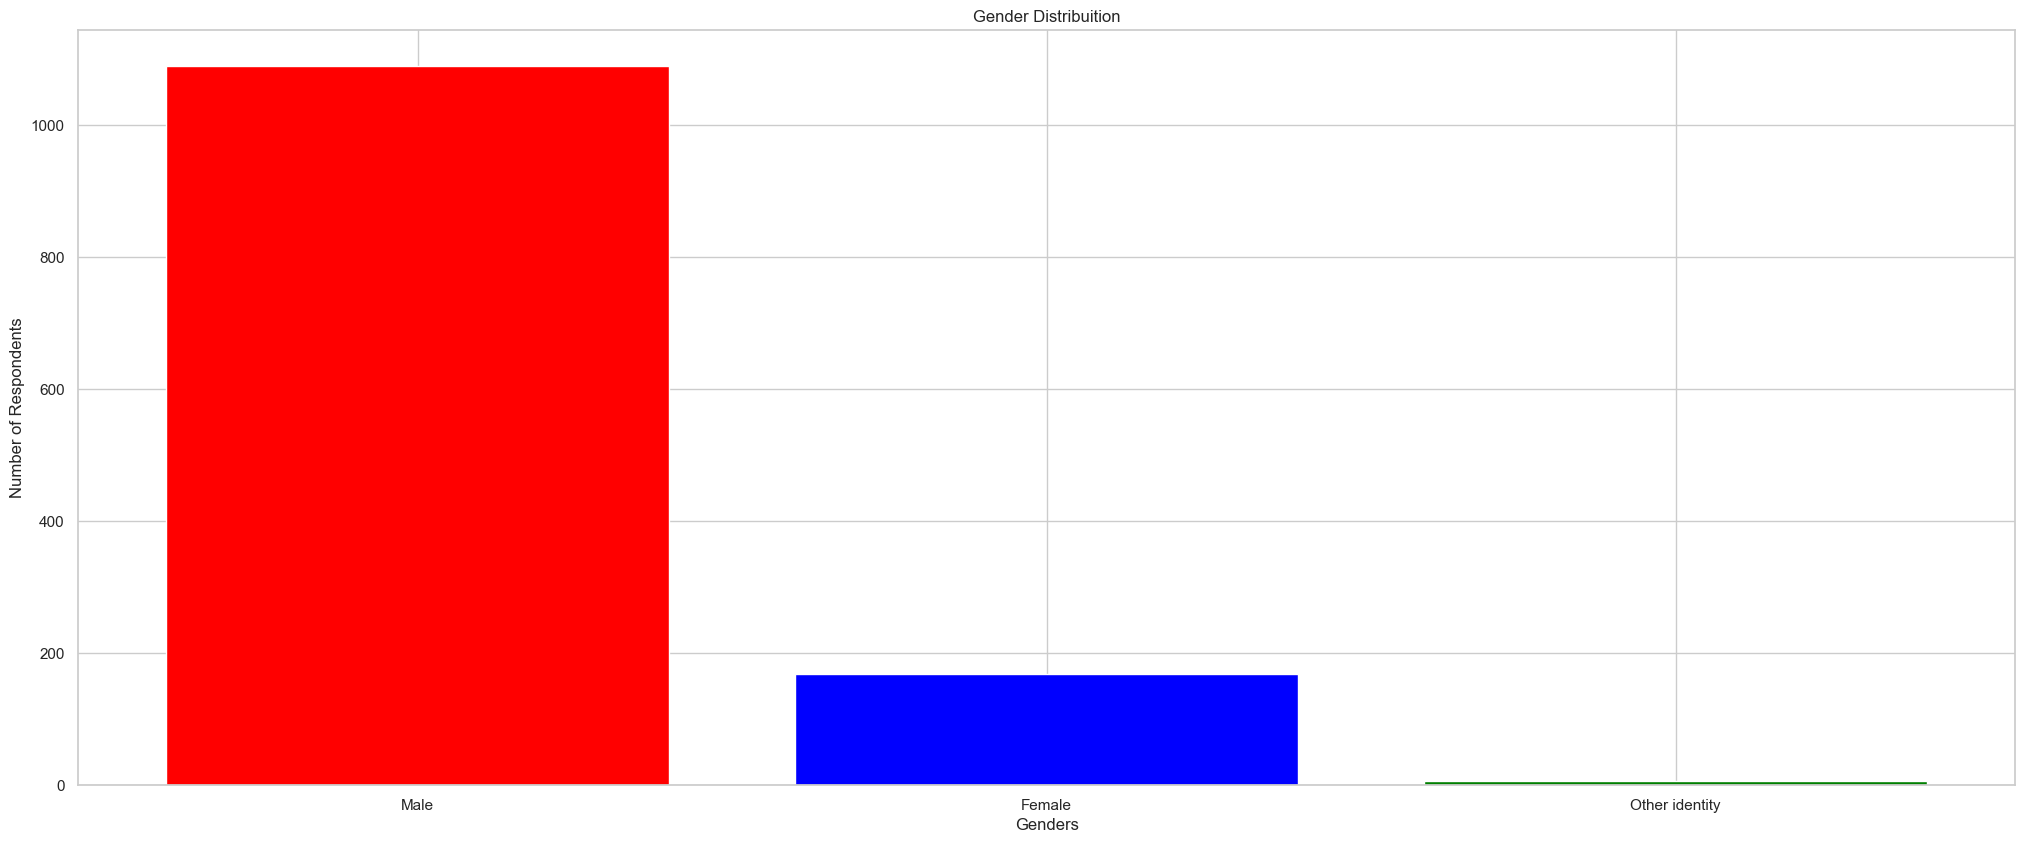

In [30]:


labels = ['Male', 'Female', 'Other identity']
gender_freq = [ len(df_demog_ds[df_demog_ds['GenderSelect'] == 'Male']),
                len(df_demog_ds[df_demog_ds['GenderSelect'] == 'Female']), 
                len(df_demog_ds[df_demog_ds['GenderSelect'] == 'A different identity'])]

fig, ax = plt.subplots(figsize=(25,10), dpi=100)

x_pos = np.arange(len(gender_freq))
colors = ['red', 'blue', 'green']

ax.bar(x_pos, gender_freq, align='center', color=colors)

ax.set_xlabel("Genders")
ax.set_ylabel("Number of Respondents")
ax.set_title("Gender Distribuition")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax
# Your code


## Gender distribution with respect to Age

C:\Users\Shoib\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


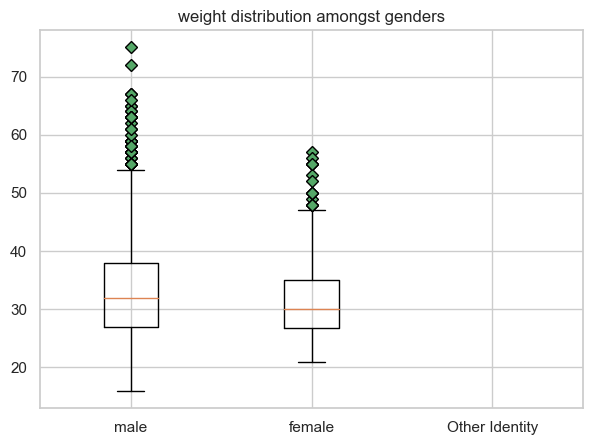

In [31]:



# Your code here
fig, ax = plt.subplots(figsize=(7,5), dpi=100)

#To define the style of the fliers.
#red_square = dict(markerfacecolor='r', marker='s') is another example, you can try define you own style.
green_diamond = dict(markerfacecolor='g', marker='D')

#Set the value of showfliers with True to show the outliers beyond the caps.
ax.boxplot([df_demog_ds[df_demog_ds['GenderSelect'] == 'Male']['Age'], 
            df_demog_ds[df_demog_ds['GenderSelect'] == 'Female']['Age'],
            [df_demog_ds[df_demog_ds['GenderSelect'] == 'A other identity']['Age']]], 
           labels=['male', 'female','Other Identity'],
           showfliers=True,
           flierprops=green_diamond)

ax.set_title("weight distribution amongst genders")
ax

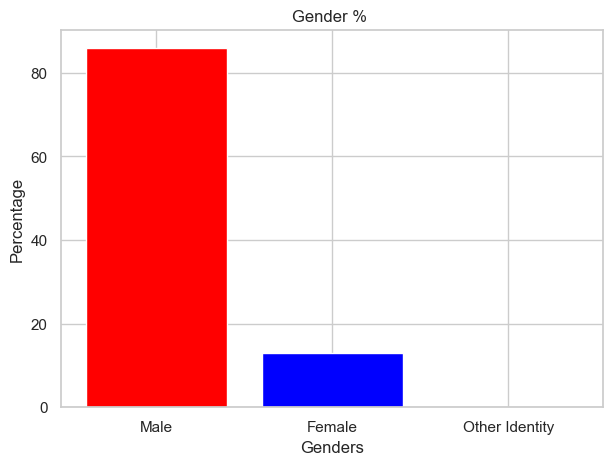

In [32]:
#plt.figure(figsize=(12,8))
#plt.title('Distribution of Gender')
#plt.xlabel('Gender Select')
#plt.ylabel('Percentage [%]')
total = len(df_demog_ds)
male_percent = round(len(df_demog_ds[df_demog_ds['GenderSelect'] == 'Male'])/total*100)
female_percent = round(len(df_demog_ds[df_demog_ds['GenderSelect'] == 'Female'])/total*100)
other_percent = round(len(df_demog_ds[df_demog_ds['GenderSelect'] == 'A other identity'])/total*100)

labels = ['Male', 'Female', 'Other Identity']
freq = [male_percent,female_percent,other_percent]

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

x_pos = np.arange(len(freq))
colors = ['red', 'blue', 'green']

ax.bar(x_pos, freq, align='center', color=colors)

ax.set_xlabel("Genders")
ax.set_ylabel("Percentage")
ax.set_title("Gender % ")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax
# Your code
 

## Countries with most number of data scientists

In [33]:
# Your Code: create and fill value into df_country
Country_Data=(df_demog_ds["Country"].value_counts()).head(5)
Country_Data




United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

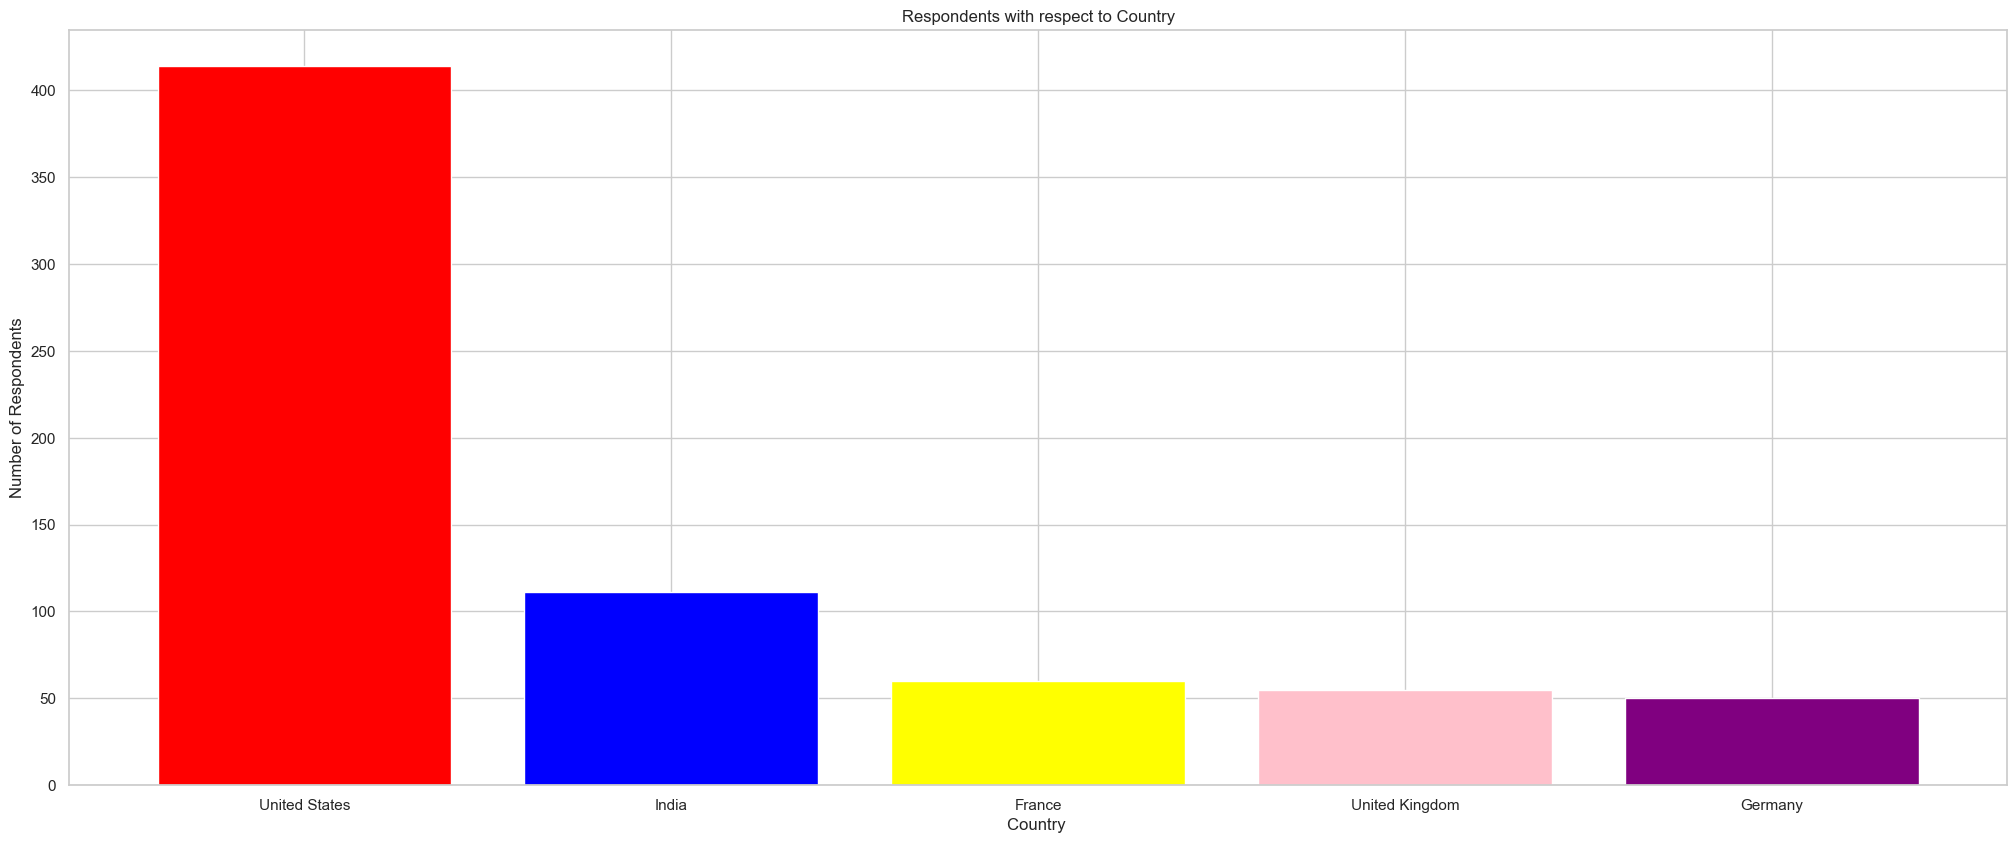

In [34]:
# Show only one suitable plot of country: either Bar plot, count plot, or Boxplot (possible or not?)
ig, ax = plt.subplots(figsize=(25,10), dpi=100)
freq = [Country_Data[0],
        Country_Data[1],
        Country_Data[2],
        Country_Data[3],
        Country_Data[4],]
x_pos = np.arange(len(freq))
colors = ['red', 'blue','yellow','pink','purple']

ax.bar(x_pos, freq, align='center', color=colors)

ax.set_xlabel("Country ")
ax.set_ylabel("Number of Respondents")
ax.set_title("Respondents with respect to Country")

ax.set_xticks(x_pos)
ax.set_xticklabels(Country_Data.index)
ax

## Mean and median age for each gender for the United States, India, Australia, Pakistan

In [ ]:
# Your Code
from statistics import mean,median
Coun = input("Enter Country:")
Gen = input("Enter Gender:")
Gen_Coun_Data = df_demog_ds[(df_demog_ds["GenderSelect"] == Gen) & (df_demog_ds["Country"] == Coun)]['Age']
print("Mean: " ,mean(Gen_Coun_Data))
print("Median: ", median(Gen_Coun_Data))

